# 2020.07.31 머신러닝 알고리즘 스터디
# Apriori Algorithm
# 어프라이어리 알고리즘

## Connect to Google Drive

In [13]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive


## Load images

In [12]:
from PIL import Image
im1 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/01.JPG")
im2 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/02.JPG")
im3 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/03.JPG")
im4 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/04.JPG")
im101 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/101.JPG")
im102 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/102.JPG")
im103 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/103.JPG")
im104 = Image.open("./gdrive/My Drive/Colab Notebooks/2020_1_data/03.study/200731_pic/104.JPG")

## 1. 서론 : 연관규칙 학습 (Association Rule) or 장바구니 분석(Market Basket Analysis)

- 대형 데이터베이스에서 변수 간의 흥미로운 관계를 발견하기 위한 규칙-기반 비지도 기계 학습 방법.
- 마케팅 분야에서 상품 추천(recommendation)을 위해 많이 사용.

### 상품 추천의 종류

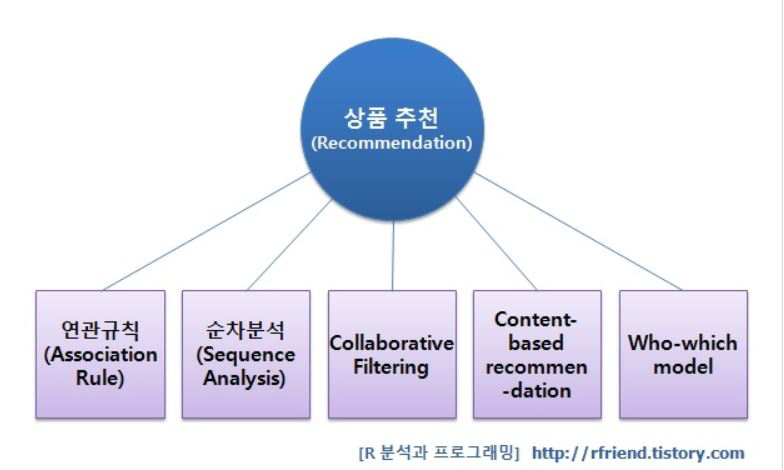

In [ ]:
im1

- 연관규칙분석(Association Rule Analysis) : 고객의 대규모 거래 데이터로부터 함께 구매가 발생하는 규칙을 도출하여, 고객이 특정 상품 구매 시 연관도 높은 상품 추천.
- 순차분석(Sequence Analysis) : 고객의 시간 흐름에 따른 구매 패턴을 도출하여, 고객이 특정 상품 구매 시 일정 시간 후 적시에 상품 추천.
- Collaborative Filtering : 추천 대상이 되는 고객 A 와 다른 고객 B에 대해 상관계수를 비교해, 서로 높은 상관이 인정되는 경우 고객 B 가 구입 완료한 상품 중에 고객 A가 미구입한 상품을 추천.(유사 고객을 찾는 것과 비슷)
- Contents-based recommendation : 과거에 구매했던 상품들의 속성과 유사한 다른 상품 아이템 중 미구매 상품 추천.
- Who-Which modeling : 특정 상품(군)을 추천하는 모형 개발하여 구매 가능성 높은 고객(군) 대상 상품 추천

### 상품 추천의 효용성

- Netflix : 대여되는 영화의 2/3가 추천을 통해 발생.<br>
이용자들이 동영상에 매긴 별점, 위치정보, 기기정보, 플레이버튼 수, 평일과 주말에 따른 선호 프로그램, 소셜 미디어 내에서 언급된 횟수 등을 분석해 알고리즘을 개발했다.
- Google News : 38% 이상이 추천을 통해 조회 발생. 
- Amazon : 35% 이상이 추천을 통한 판매. <br><br>
* 출처 : 넷플릭스의 빅데이터, 인문학적 상상력과의 접점, 조영신, KISDI 동향 Focus 

### 연관규칙 분석

- 특정 사건이 발생했을 때, 함께 빈번하게 발생하는 또 다른 사건의 규칙
- Item set(항목 집합) : 전체 Item 중에서 가능한 부분 집합.
- The set of Item sets(항목 집합의 집합) : Item의 부분집합들로 구성된 집합.
- 특정 Item set이 발생했을 때 또 다른 Item set이 발생하는 규칙. <br><br>

- 예를 들어, [남성, 금요일, 맥주] ----> [기저귀]
: 금요일에 맥주를 사는 남성 고객은 기저귀도 같이 산다.

### 연관규칙 분석의 척도

#### 지지도(Support) <br>
조건절(A)이 얼어날 확률. 규칙을 얼마나 자주 적용할 수 있나?

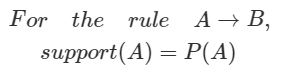

In [ ]:
im2

#### 신뢰도(Confidence)
조건절(A)이 주어졌을 때, 결과절(B)이 일어날 조건부확률. 아이템 집합 간의 연관성 강도를 측정.

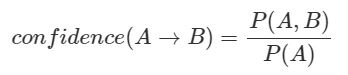

In [ ]:
im3

#### 향상도(lift)
생선된 규칙이 실제 효용가치가 있는지 판별. <br>
향상도가 1이라면, 조건절과 결과절은 서로 독립임을 의미한다. 따라서 이는 연관성이 없다는 것을 의미한다. <br>
향성도가 2라면, 두 사건이 독립이라는 걸 가정했을 때, 2배로 긍정적인 연관관계를 나타낸다.

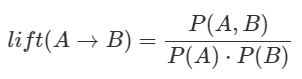

In [ ]:
im4

지지도, 신뢰도, 향상도가 모두 클 때, 규칙1 이 규칙2 보다 효과적인 규칙이라고 결론을 내릴 수 있다.

#### 활용 분야
- 마케팅 활동 (프로모션 가격 또는 제품 배치)
- 웹 사용 마이닝
- 침입탐지
- 연속 생산 및 생물 정보학
- 암 데이터 분석에서 단백질 서열과 자주 발견되는 DNA 패턴
- 증상과 질병 간의 상관관계

#### 예시 알고리즘
- Apriori
- FP-Growth
- Eclat

## 2. 왜 효율적인 연관규칙 탐색 알고리즘이 필요할까?

- 거래에서 나타나는 모든 item set I를 I = {I_1, I_2, ..., I_k} 라고 정의.
- 모든 가능한 부분집합의 갯수 : M = 2_k -1 개 (공집합 제외)
- 모든 가능한 연관규칙의 갯수 : Number of rules = 3^k - 2^(k+1) + 1
- 그래프에서 볼 수 있듯이, item이 증가할 때마다 가능한 경우의 수가 지수적으로 증가.
- item = 5 : subset 31, rule 180 
- item = 10 : subset 1,023, rule 57,0002
- 그 결과, 계산복잡도와 필요 연산량이 너무 많아진다.
- 따라서, "빠르고 효율적인 연관규칙 계산 알고리즘", "연관규칙 평가 기준"이 필요하다.

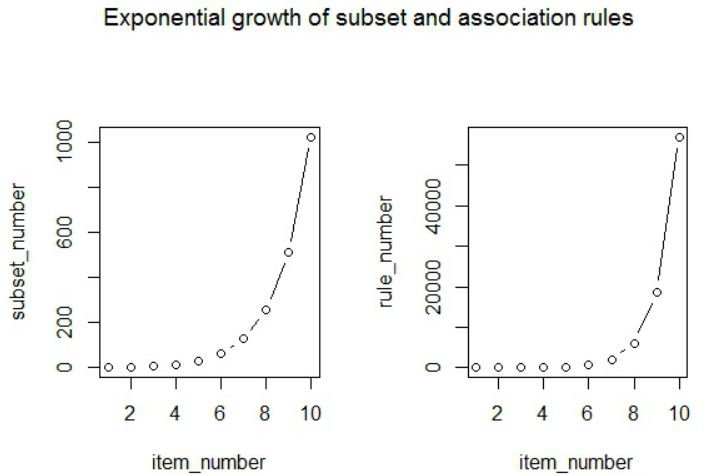

In [4]:
im101

## 3. 연관규칙 생성 전략 및 알고리즘


1. 모든 가능한 Item set 의 갯수를 줄이는 전략 : Apriori algorithm
2. Transaction 개수를 줄이는 전략 : DHP algorithm
3. 비교하는 수를 줄이는 전략 : FP-Growth algorithm
4. Vertical Data Format 사용 : ECLAT
5. Brute-Force

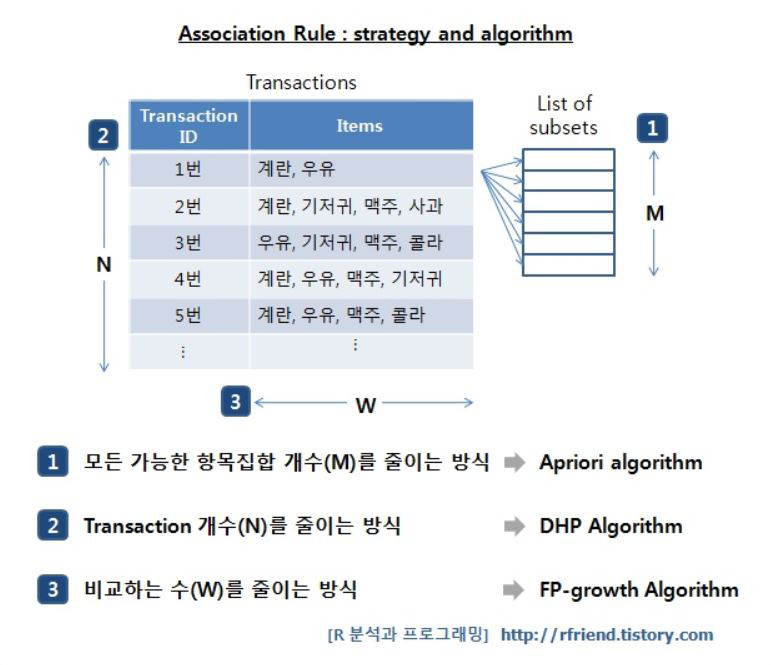

In [5]:
im102

## 4. Motivation of Apriori Algorithm

- 목표: 커피, 우유, 계란을 같이 사는 사람의 수를 알고 싶다.
- 커피, 우유를 사는 사람의 수 >= 커피, 우유, 계란을 사는 사람의 수
- A(커피,우유) 가 B(커피,우유,계란) 의 부분 집합이라면, support(A) 는 support(B) 보다 크거나 같다.
- 이를 식으로 나타내면 다음과 같다.

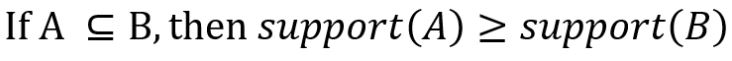

In [6]:
im103

- support(B)가 우리가 설정해 놓은 min. support 값보다 크면, support(A) 또한 min. support 보다 크다.
- 따라서, 우리가
1. A가 B의 부분집합
2. B의 support가 min.support 이상 <br>

- 위 두 가지 요건을 만족한다면, support(A)도 만족할 것이다.

## 5. Apriori Algorithm

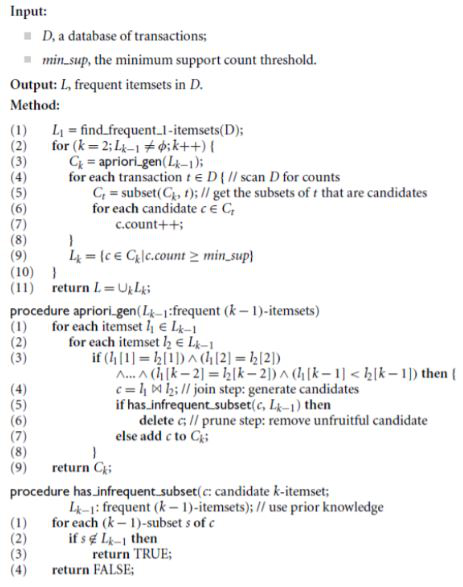

In [8]:
im104

다음과 같은 item set을 가정하자. <br>
minimun support(min_sup) 값은 2/9 로 가정한다.

|&nbsp;&nbsp; ID &nbsp;&nbsp;| &nbsp;&nbsp; itemset (방문한 나라)&nbsp;&nbsp; |
| --- | --- |
|&nbsp; &nbsp; &nbsp; lim &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 독일, 스위스, 스페인 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; song &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 스위스, 홍콩 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; ko &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 스위스, 페로 제도 | 
|&nbsp; &nbsp; &nbsp; kim &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 독일, 스위스, 홍콩 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; jeong &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 독일, 페로 제도 | 
|&nbsp; &nbsp; &nbsp; choi &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 스위스, 페로 제도 | 
|&nbsp; &nbsp; &nbsp; lee &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 독일, 페로 제도 &nbsp; &nbsp; &nbsp; | 
|&nbsp; &nbsp; &nbsp; jang &nbsp; &nbsp; &nbsp; |&nbsp; &nbsp; &nbsp; 독일, 스위스, 페로제도, 스페인 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; park &nbsp; &nbsp; &nbsp; |&nbsp; &nbsp; &nbsp; 독일, 스위스, 페로제도 &nbsp; &nbsp; &nbsp;| 

하나의 item에 대해 item의 빈도를 찾는다.<br><br>

|&nbsp;&nbsp; Item set &nbsp;&nbsp;| &nbsp;&nbsp; count &nbsp;&nbsp; |
| --- | --- |
|&nbsp; &nbsp; &nbsp; 독일 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 6 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 스위스 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 7 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 페로 제도 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 6 | 
|&nbsp; &nbsp; &nbsp; 홍콩 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 | 

각각에 대해 minimum support 값 (2/9) 을 만족하는지 확인한다. <br><br>

|&nbsp;&nbsp; Item set &nbsp;&nbsp;| &nbsp;&nbsp; count &nbsp;&nbsp; |
| --- | --- |
|&nbsp; &nbsp; &nbsp; 독일 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 6 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 스위스 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 7 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 페로 제도 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 6 | 
|&nbsp; &nbsp; &nbsp; 홍콩 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 | 

위의 모든 itemset에서 원소가 2개인 집합을 만들고, 각각의 빈도를 구한다. Itemset의 subset의 min.support가 조건을 만족하지 못했다면, 제거한다.<br><br>

|&nbsp;&nbsp; Item set &nbsp;&nbsp;| &nbsp;&nbsp; count &nbsp;&nbsp; |
| --- | --- |
|&nbsp; &nbsp; &nbsp; 독일, 스위스 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 4 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 독일, 페로제도 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 4 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 독일, 홍콩 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 1 | 
|&nbsp; &nbsp; &nbsp; 독일, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 스위스, 페로제도 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 4 | 
|&nbsp; &nbsp; &nbsp; 스위스, 홍콩 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 스위스, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 페로제도, 홍콩 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 0 | 
|&nbsp; &nbsp; &nbsp; 페로제도, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 1 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 홍콩, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 0 | 

min. support(2)을 만족하지 못하는 itemset을 없앤다. <br><br>

|&nbsp;&nbsp; Item set &nbsp;&nbsp;| &nbsp;&nbsp; count &nbsp;&nbsp; |
| --- | --- |
|&nbsp; &nbsp; &nbsp; 독일, 스위스 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 4 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 독일, 페로제도 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 4 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 독일, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 
|&nbsp; &nbsp; &nbsp; 스위스, 페로제도 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 4 | 
|&nbsp; &nbsp; &nbsp; 스위스, 홍콩 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 스위스, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 

이제 itemset에서 원소가 3개인 집합을 만들고, min.support 조건을 고려하여 구한다. 결과는 다음과 같다.

|&nbsp;&nbsp; Item set &nbsp;&nbsp;| &nbsp;&nbsp; count &nbsp;&nbsp; |
| --- | --- |
|&nbsp; &nbsp; &nbsp; 독일, 스위스, 페로제도 &nbsp; &nbsp; &nbsp;| &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;|
|&nbsp; &nbsp; &nbsp; 독일, 스위스, 스페인 &nbsp; &nbsp; &nbsp; | &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp;| 


- 이와 같은 방식으로 k가 아이템의 전체 숫자가 될 때까지 또는 다음 집합이 공집합이 될 때까지 진행한다.
- 이 과정에서 만들어진 최종 집합에 속한 item set 들이 minimum support를 만족하는 item set이 된다.


## 6. 장점, 단점, 특징

#### 장점
- 다른 연구가설 탐지 가능
- 원리 간단, 이해 분석 용이

#### 단점
- 비즈니스 측면 중요한 현실적 중요 연관규칙 부족
- 연관규칙 결과 다량 발생
- Large number of candidate itemsets
- Large number of database scans

#### 활용 사례
- 통신: 이탈 고객 예상, 기지국 위치 선정
- 금융: 대출 심사, 카드 연체 고객 예상
- 의료: 환자 질병 예측, 약품 부작용 예상
- 유통: 매장 진열 방법, 장바구니 분석

## Reference
- https://rfriend.tistory.com/190 <br>
- https://rfriend.tistory.com/192 <br>
- https://process-mining.tistory.com/97 <br>
- Comparing the Performance of Frequent Pattern Mining Algorithms, Kanwal Gargm Deepak Kumar, May 2013